**Neighbors-based classification** ([KNN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification))

Neighbors-based classification is a form of instance-based or non-generalizing learning. Rather than constructing a general internal model, it simply stores instances of the training data. Classification is determined by a straightforward majority vote from the nearest neighbors of each point. In this approach, a query point is assigned the data class that has the most representatives within its nearest neighbors.

scikit-learn offers two implementations of nearest neighbors classifiers:

1. **KNeighborsClassifier**: Implements learning based on the `k` nearest neighbors of each query point, where `k` is an integer value specified by the user.

2. **RadiusNeighborsClassifier**: Implements learning based on the number of neighbors within a fixed radius (`r`) of each training point, where `r` is a floating-point value specified by the user.

The `k`-neighbors classification in `KNeighborsClassifier` is the most commonly used technique. The optimal choice of the value `k` is highly data-dependent: generally, a larger `k` suppresses the effects of noise but makes the classification boundaries less distinct.

In scenarios where the data is not uniformly sampled, radius-based neighbors classification in `RadiusNeighborsClassifier` can be a better choice. The user specifies a fixed radius `r`, allowing points in sparser neighborhoods to use fewer nearest neighbors for classification. However, this method becomes less effective in high-dimensional parameter spaces due to the "curse of dimensionality."

The basic nearest neighbors classification uses uniform weights by default, meaning the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under certain circumstances, it may be beneficial to weight the neighbors so that closer neighbors contribute more to the fit. This can be achieved through the `weights` keyword. The default value, `weights='uniform'`, assigns uniform weights to each neighbor. Alternatively, `weights='distance'` assigns weights proportional to the inverse of the distance from the query point. Users can also supply a custom function of the distance to compute the weights.


For more details, refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) on `KNeighborsClassifier`.


Fow this example wi will use [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) 

In [59]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Load Iris dataset

In [60]:
iris_dataset = load_iris()

Let`s see what it includes

In [61]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Let`s see features does it has

In [62]:
print("feature_names")
iris_dataset['feature_names']

Extract data from dataset

In [63]:
iris_data = iris_dataset["data"]

feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Create a Pandas dataframe from this dataset. It`s will help us at the future

In [64]:
iris_df = pd.DataFrame(iris_data, columns=iris_dataset.feature_names)
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [65]:
iris_dataset_extracted = iris_df[['sepal length (cm)','petal length (cm)', 'petal width (cm)']]

Visualise data

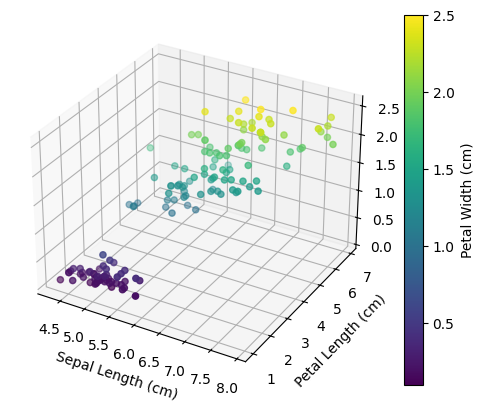

In [66]:
x = iris_dataset_extracted['sepal length (cm)']
y = iris_dataset_extracted['petal length (cm)']
z = iris_dataset_extracted['petal width (cm)']

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating the scatter plot with color based on petal width
scatter = ax.scatter(x, y, z, c=z, marker='o')

# Adding labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')

# Display the colorbar for the z-axis
cbar = plt.colorbar(scatter, ax=ax, label='Petal Width (cm)')

# Display the plot
plt.show()

Split data to test data and train data

In [76]:
x_train, x_test, y_train, y_test = train_test_split(iris_dataset_extracted, iris_dataset['target'], test_size = 0.2, random_state=0)

Train model

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)


Predict on test data

In [81]:
knn_predictions = knn_model.predict(x_test)

print(iris_dataset.target_names[knn_predictions])


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']


Checking accuracy:

In [79]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)

print(f'Accuracy: {accuracy}')

Accuracy_1: 1.0, accuracy_2: 1.0
